In [1]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy import signal
import pandas as pd

d:\program files\jetbrains\ideaprojects\ebeat\venv\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
pathAudio = 'C:/Users/Admin/Downloads/Technology Lab/sampling/in-1sec/'
files = librosa.util.find_files(pathAudio, ext=['wav'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))
samples = []
for file_name in files:
    loaded_audio_file = AudioSegment.from_wav(file_name)
    numeric_sample_array = loaded_audio_file.get_array_of_samples()
    resampled_part = signal.resample(numeric_sample_array, 882)
    samples.append(resampled_part)
samples = np.array(samples)
samples.shape

(222, 882)

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized_samples = min_max_scaler.fit_transform(samples)
normalized_samples.shape

(222, 882)

In [4]:
normalized_samples = normalized_samples.reshape(222, 882, 1)
normalized_samples.shape

(222, 882, 1)

In [5]:
all_samples = normalized_samples.reshape(195804)
all_samples

array([0.61667124, 0.47142056, 0.44955661, ..., 0.47062554, 0.49467703,
       0.54357459])

In [6]:
frami = pd.DataFrame(columns=['actual'], data=all_samples)
frami

,actual
0,0.616671
1,0.471421
2,0.449557
3,0.553337
4,0.479708
...,...
195799,0.515698
195800,0.447553
195801,0.470626
195802,0.494677


In [7]:
X = []
Y = []
for i in range(0, len(all_samples)-880):
    if i < len(all_samples)-900:
        Y.append(all_samples[i+880:i+900])
        X.append(np.array(all_samples[i:i+880]))

In [8]:
X = np.array(X).reshape(-1, 880, 1)
Y = np.array(Y).reshape(194904, -1)

In [9]:
X.shape

(194904, 880, 1)

In [10]:
Y.shape

(194904, 20)

In [13]:
from keras.layers import LSTM, Dense
from keras.models import  Sequential

model = Sequential()
#model.add(LSTM(100, input_shape=(880, 1), return_sequences=True, stateful=True, batch_size=32, activation='sigmoid'))
model.add(LSTM(100, input_shape=(880, 1), activation='sigmoid'))
model.add(Dense(20))

model.compile(optimizer='rmsprop', loss='mse')

In [14]:
model.fit(X, Y, epochs=1)

6091/6091 [==============================] - 1466s 240ms/step - loss: 0.0174


In [51]:
pred = model.predict(X[11000].reshape(-1, 880, 1))

In [52]:
pred

array([[0.5073369 , 0.5294864 , 0.5176908 , 0.5180981 , 0.49717548,
        0.50073934, 0.49235636, 0.4791613 , 0.48543945, 0.46600085,
        0.46123216, 0.47872478, 0.45707938, 0.46668753, 0.45516405,
        0.45658487, 0.45948735, 0.47013634, 0.49856463, 0.4954304 ]],
      dtype=float32)

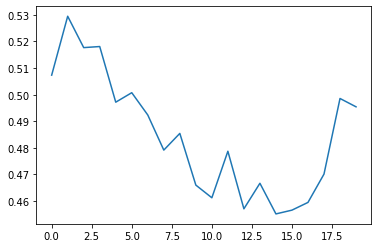

In [53]:
plt.plot(pred[0])
plt.show()

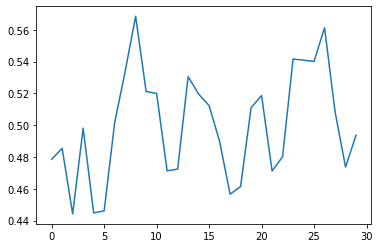

In [54]:
plt.plot(X[11001][:30])
plt.show()